In [76]:
from datetime import datetime, timedelta
from control.modules.thrusters import ThrustersControl, ThrustersParameters
from input_output.base import Stamped
from input_output.definitions.simulation import Boundary, HeatSource, TemperatureBoundary
from input_output.modules.thrusters import ThrustersControlValues, ThrustersSensorValues, ThrustersSimulationInputs, ThrustersSimulationOutputs
from orchestration.simulator import Simulator, SimulatorModel


simulation_inputs = ThrustersSimulationInputs(
    thrusters_aft=HeatSource(heat_flow=Stamped.stamp(9000)),
    thrusters_fwd=HeatSource(heat_flow=Stamped.stamp(4300)),
    thrusters_seawater_supply=Boundary(
        temperature=Stamped.stamp(32), flow=Stamped.stamp(64)),
    thrusters_module_supply=TemperatureBoundary(temperature=Stamped.stamp(50)))

control = ThrustersControl(ThrustersParameters(cooling_mix_setpoint=40, cooling_pump_dutypoint=0.9, recovery_pump_dutypoint=0.5, max_temp=70))
control.to_recovery() 

thrusters_model = SimulatorModel(
    fmu_path=str(
        "../src/simulation/models/thrusters/thruster_moduleV6.fmu"
    ),
    sensor_values_cls=ThrustersSensorValues,
    control_values_cls=ThrustersControlValues,
    simulation_outputs_cls=ThrustersSimulationOutputs,
    simulation_inputs=simulation_inputs,
    control = control,
    tick_duration = timedelta(seconds = 1))

simulation = Simulator(thrusters_model)

result = await simulation.run(2000)


[WARNING] Warning: The following was detected at time: 3.37221189657358E-29
[WARNING]   Thruster_Module_FMU.thrusterModule.flowJoin_mixing_return: Flow splitRatio is far above 1. But it must be between 0 and 1. (is 1.00639)
  Failed condition: thrusterModule.flowJoin_mixing_return.splitRatio <= 1.001

[WARNING] Warning: The following was detected at time: 6.459465245663797E-26
[WARNING]   Thruster_Module_FMU.thrusterModule.flowJoin_thruster_out: Flow splitRatio is negative and far below 0. But it must be between 0 and 1. (is -3.30264e+15)
  Failed condition: thrusterModule.flowJoin_thruster_out.splitRatio >= -0.001

[WARNING] Warning: The following was detected at time: 1.439614660203414E-12
[WARNING]   Thruster_Module_FMU.thrusterModule.flowJoin_AFT: Flow splitRatio is far above 1. But it must be between 0 and 1. (is 1.001)
  Failed condition: thrusterModule.flowJoin_AFT.splitRatio <= 1.001

[WARNING] Warning: The following was detected at time: 6.185076671684502E-06
[WARNING]   Thrus

In [77]:
result

thrusters_module_return__flow__l_min,thrusters_module_supply__flow__l_min,thrusters_module_return__temperature__C,thrusters_flow_aft__flow__l_min,thrusters_flow_fwd__flow__l_min,thrusters_pressure_cooling__pressure__Bar,thrusters_pressure_recovery__pressure__Bar,thrusters_temperature_aft_supply__temperature__C,thrusters_temperature_fwd_supply__temperature__C,thrusters_temperature_supply__temperature__C,thrusters_temperature_aft_return__temperature__C,thrusters_temperature_fwd_return__temperature__C,thrusters_seawater_return__temperature__C,thrusters_mix_aft__position_rel__ratio,thrusters_mix_fwd__position_rel__ratio,thrusters_mix_exchanger__position_rel__ratio,thrusters_flowcontrol_aft__position_rel__ratio,thrusters_flowcontrol_fwd__position_rel__ratio,thrusters_shutoff_recovery__position_rel__ratio,thrusters_switch_aft__position_rel__ratio,thrusters_switch_fwd__position_rel__ratio,thrusters_pump1__flow__l_min,thrusters_pump2__flow__l_min,thrusters_pump1__speed__Hz,thrusters_pump2__speed__Hz,thrusters_pump1__op_time__s,thrusters_pump2__op_time__s,thrusters_flow_fwd__temperature__C,thrusters_flow_aft__temperature__C,time
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,datetime[μs]
9.119862,9.119862,50.0,4.557693,4.560333,0.074518,0.074518,44.999997,44.999997,45.000344,50.195969,50.054015,43.652567,1.0,1.0,1.0,1.0,1.0,1.0,0.00005,0.00005,9.118026,0.0,0.003834,0.0,1.0,0.0,44.963333,44.963333,2025-03-26 14:44:08.870112
19.046006,19.046006,50.0,9.522939,9.522966,0.063704,0.063704,44.999934,44.999934,45.000335,50.385134,50.103826,42.349002,1.0,1.0,1.0,1.0,1.0,1.0,0.00001,0.00001,19.045905,0.0,38.331502,0.0,2.001,0.0,44.964239,44.964239,2025-03-26 14:44:09.870112
19.967867,19.967867,50.000002,9.983888,9.983877,0.070184,0.070184,44.999577,44.999577,45.000324,50.543485,50.126663,41.191257,1.0,1.0,1.0,1.0,1.0,1.0,0.00001,0.00001,19.967765,0.0,38.333324,0.0,3.002,0.0,44.965406,44.965406,2025-03-26 14:44:10.870112
20.022322,20.022322,50.000008,10.011111,10.01111,0.070569,0.070569,44.998674,44.998674,45.000313,50.696846,50.147459,40.163034,1.0,1.0,1.0,1.0,1.0,1.0,0.00001,0.00001,20.02222,0.0,38.333333,0.0,4.003,0.0,44.966553,44.966553,2025-03-26 14:44:11.870112
20.026037,20.026037,50.000021,10.012968,10.012968,0.070595,0.070595,44.997015,44.997015,45.000301,50.846754,50.167728,39.250698,1.0,1.0,1.0,1.0,1.0,1.0,0.00001,0.00001,20.025935,0.0,38.333332,0.0,5.003,0.0,44.96766,44.96766,2025-03-26 14:44:12.870112
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
20.025842,20.025842,59.505764,10.01287,10.01287,0.070594,0.070594,50.000088,50.00012,50.00016,62.859245,56.143581,31.999998,1.0,1.0,1.0,1.0,1.0,1.0,0.00001,0.00001,20.02574,0.0,38.333333,0.0,1997.783,0.0,49.999966,49.999966,2025-03-26 15:17:23.870112
20.025842,20.025842,59.505785,10.01287,10.01287,0.070594,0.070594,50.00009,50.000121,50.000163,62.859245,56.143581,31.999998,1.0,1.0,1.0,1.0,1.0,1.0,0.00001,0.00001,20.02574,0.0,38.333333,0.0,1998.784,0.0,49.999968,49.999968,2025-03-26 15:17:24.870112
20.025842,20.025842,59.505805,10.01287,10.01287,0.070594,0.070594,50.000091,50.000122,50.000165,62.859245,56.143582,31.999998,1.0,1.0,1.0,1.0,1.0,1.0,0.00001,0.00001,20.02574,0.0,38.333333,0.0,1999.785,0.0,49.999971,49.999971,2025-03-26 15:17:25.870112


In [78]:
#heat sources: thruster fwd, thruster aft 
#heat recovered
#heat dumped: seawater side and cooling loop side 
#temperatures: thruster fwd/aft in/out, seawater in/out, module in/out
#flow rates: seawater, thruster fwd/aft, module in/out 

In [79]:
def compute_heat(temp1, temp2, flow):
    return (temp1-temp2)*flow*4184/60

In [80]:
df = result.to_pandas().set_index('time').resample('s').mean()
df = df.assign(thrusters_heat_recovered = compute_heat(df['thrusters_module_return__temperature__C'], simulation_inputs.thrusters_module_supply.temperature.value, df['thrusters_module_supply__flow__l_min']),
               thrusters_heat_dumped = compute_heat(df['thrusters_seawater_return__temperature__C'], simulation_inputs.thrusters_seawater_supply.temperature.value, simulation_inputs.thrusters_seawater_supply.flow.value),
               thrusters_aft_heat = compute_heat(df['thrusters_temperature_aft_return__temperature__C'], df['thrusters_temperature_aft_supply__temperature__C'], df['thrusters_flow_aft__flow__l_min']),
               thrusters_fwd_heat = compute_heat(df['thrusters_temperature_fwd_return__temperature__C'], df['thrusters_temperature_fwd_supply__temperature__C'], df['thrusters_flow_fwd__flow__l_min']))

In [81]:
df

,thrusters_module_return__flow__l_min,thrusters_module_supply__flow__l_min,thrusters_module_return__temperature__C,thrusters_flow_aft__flow__l_min,thrusters_flow_fwd__flow__l_min,thrusters_pressure_cooling__pressure__Bar,thrusters_pressure_recovery__pressure__Bar,thrusters_temperature_aft_supply__temperature__C,thrusters_temperature_fwd_supply__temperature__C,thrusters_temperature_supply__temperature__C,...,thrusters_pump1__speed__Hz,thrusters_pump2__speed__Hz,thrusters_pump1__op_time__s,thrusters_pump2__op_time__s,thrusters_flow_fwd__temperature__C,thrusters_flow_aft__temperature__C,thrusters_heat_recovered,thrusters_heat_dumped,thrusters_aft_heat,thrusters_fwd_heat
time,,,,,,,,,,,,,,,,,,,,,
2025-03-26 14:44:08,9.119862,9.119862,50.000000,4.557693,4.560333,0.074518,0.074518,44.999997,44.999997,45.000344,...,0.003834,0.0,1.000,0.0,44.963333,44.963333,0.000002,52004.630946,1651.400313,1607.214281
2025-03-26 14:44:09,19.046006,19.046006,50.000000,9.522939,9.522966,0.063704,0.063704,44.999934,44.999934,45.000335,...,38.331502,0.0,2.001,0.0,44.964239,44.964239,0.000263,46186.905062,3576.129704,3389.332143
2025-03-26 14:44:10,19.967867,19.967867,50.000002,9.983888,9.983877,0.070184,0.070184,44.999577,44.999577,45.000324,...,38.333324,0.0,3.002,0.0,44.965406,44.965406,0.002752,41019.968776,3859.723183,3569.523883
2025-03-26 14:44:11,20.022322,20.022322,50.000008,10.011111,10.011110,0.070569,0.070569,44.998674,44.998674,45.000313,...,38.333333,0.0,4.003,0.0,44.966553,44.966553,0.010966,36431.078229,3977.939757,3594.408007
2025-03-26 14:44:12,20.026037,20.026037,50.000021,10.012968,10.012968,0.070595,0.070595,44.997015,44.997015,45.000301,...,38.333332,0.0,5.003,0.0,44.967660,44.967660,0.029267,32359.382894,4084.507814,3610.386433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-26 15:17:23,20.025842,20.025842,59.505764,10.012870,10.012870,0.070594,0.070594,50.000088,50.000120,50.000160,...,38.333333,0.0,1997.783,0.0,49.999966,49.999966,13274.502156,-0.011051,8978.658955,4289.554068
2025-03-26 15:17:24,20.025842,20.025842,59.505785,10.012870,10.012870,0.070594,0.070594,50.000090,50.000121,50.000163,...,38.333333,0.0,1998.784,0.0,49.999968,49.999968,13274.530873,-0.011051,8978.658251,4289.553362
2025-03-26 15:17:25,20.025842,20.025842,59.505805,10.012870,10.012870,0.070594,0.070594,50.000091,50.000122,50.000165,...,38.333333,0.0,1999.785,0.0,49.999971,49.999971,13274.558980,-0.011051,8978.657610,4289.552718


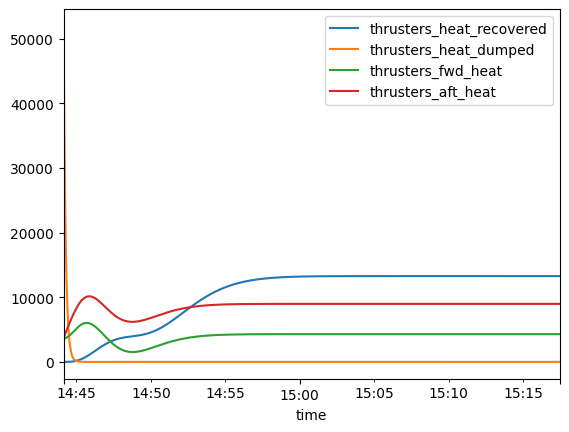

In [82]:
ax = df.thrusters_heat_recovered.plot()
ax = df.thrusters_heat_dumped.plot()
ax = df.thrusters_fwd_heat.plot()
ax = df.thrusters_aft_heat.plot()
ax.legend()

<Axes: xlabel='time'>

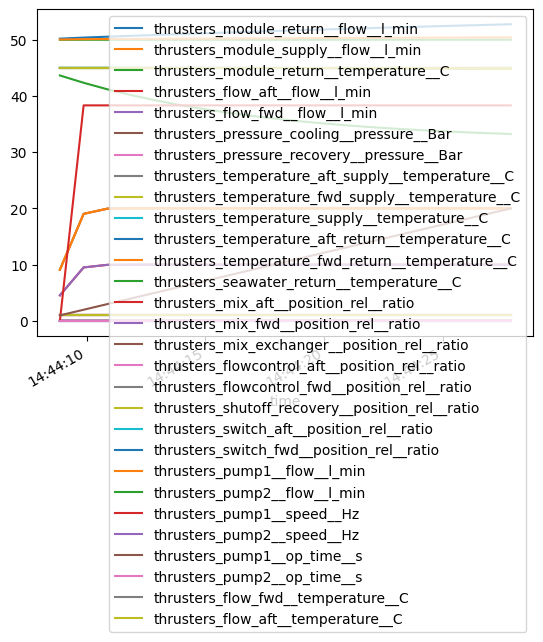

In [5]:
result.to_pandas().set_index("time").plot()